In [71]:
import pandas as pd
import numpy as np


SEED = 20
np.random.seed(SEED)

# Creating our Dataset

In [84]:
data = pd.read_csv('/content/stars_csv.csv')
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# Checking missing values

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


# Creating our Inputs and Label

In [74]:
X = data.iloc[:, :]
X = X.drop('Star type', axis = 1)
X.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M


In [75]:
y = data['Star type']
y

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Star type, Length: 240, dtype: int64

# One hot encoding our categorical variables

In [76]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = X.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['Star color', 'Spectral Class']),
    remainder = 'passthrough',
    sparse_threshold = 0
    )
X = one_hot.fit_transform(X)
one_hot.get_feature_names_out(cols)

array(['onehotencoder__Star color_Blue',
       'onehotencoder__Star color_Blue ',
       'onehotencoder__Star color_Blue White',
       'onehotencoder__Star color_Blue white',
       'onehotencoder__Star color_Blue white ',
       'onehotencoder__Star color_Blue-White',
       'onehotencoder__Star color_Blue-white',
       'onehotencoder__Star color_Orange',
       'onehotencoder__Star color_Orange-Red',
       'onehotencoder__Star color_Pale yellow orange',
       'onehotencoder__Star color_Red', 'onehotencoder__Star color_White',
       'onehotencoder__Star color_White-Yellow',
       'onehotencoder__Star color_Whitish',
       'onehotencoder__Star color_Yellowish',
       'onehotencoder__Star color_Yellowish White',
       'onehotencoder__Star color_white',
       'onehotencoder__Star color_yellow-white',
       'onehotencoder__Star color_yellowish',
       'onehotencoder__Spectral Class_A',
       'onehotencoder__Spectral Class_B',
       'onehotencoder__Spectral Class_F',
       

In [77]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(cols))

,onehotencoder__Star color_Blue,onehotencoder__Star color_Blue,onehotencoder__Star color_Blue White,onehotencoder__Star color_Blue white,onehotencoder__Star color_Blue white,onehotencoder__Star color_Blue-White,onehotencoder__Star color_Blue-white,onehotencoder__Star color_Orange,onehotencoder__Star color_Orange-Red,onehotencoder__Star color_Pale yellow orange,...,onehotencoder__Spectral Class_B,onehotencoder__Spectral Class_F,onehotencoder__Spectral Class_G,onehotencoder__Spectral Class_K,onehotencoder__Spectral Class_M,onehotencoder__Spectral Class_O,remainder__Temperature (K),remainder__Luminosity(L/Lo),remainder__Radius(R/Ro),remainder__Absolute magnitude(Mv)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3068.0,0.002400,0.1700,16.12
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3042.0,0.000500,0.1542,16.60
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2600.0,0.000300,0.1020,18.70
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2800.0,0.000200,0.1600,16.65
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1939.0,0.000138,0.1030,20.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,38940.0,374830.000000,1356.0000,-9.93
236,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,30839.0,834042.000000,1194.0000,-10.63
237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8829.0,537493.000000,1423.0000,-10.73
238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9235.0,404940.000000,1112.0000,-11.23


# Splitting our data into 80% for training and 20% for testing

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

# Training our model and checking the Accuracy

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train, y_train)
print(f'Accuracy of the train tree model is: {tree_model.score(X_train, y_train)}')
y_pred_tree = tree_model.predict(X_test)
print(f'The accuracy of the Tree model is: {accuracy_score(y_test, y_pred_tree)}')

Accuracy of the train tree model is: 1.0
The accuracy of the Tree model is: 1.0


# Checking the path that our tree chose

[Text(0.375, 0.9, 'x[29] <= -7.515\ngini = 0.833\nsamples = 192\nvalue = [32, 32, 32, 32, 32, 32]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 0, 0, 0, 32]'),
 Text(0.5, 0.7, 'x[27] <= 0.071\ngini = 0.8\nsamples = 160\nvalue = [32, 32, 32, 32, 32, 0]'),
 Text(0.25, 0.5, 'x[10] <= 0.5\ngini = 0.667\nsamples = 96\nvalue = [32, 32, 32, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32, 0, 0, 0]'),
 Text(0.375, 0.3, 'x[29] <= 15.515\ngini = 0.5\nsamples = 64\nvalue = [32, 32, 0, 0, 0, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0, 0, 0, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[29] <= -4.97\ngini = 0.5\nsamples = 64\nvalue = [0, 0, 0, 32, 32, 0]'),
 Text(0.625, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 0, 0, 32, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 0, 32, 0, 0]')]

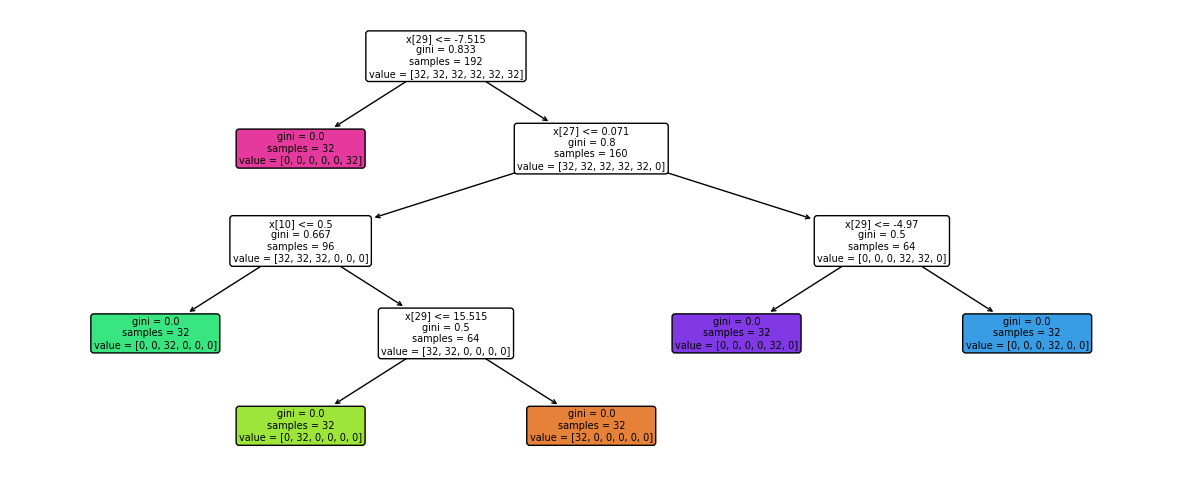

In [80]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (15, 6))
plot_tree(tree_model, filled = True, fontsize = 7, rounded = True)

# Checking other metrics

In [81]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_tree, average='micro')
recall = recall_score(y_test, y_pred_tree, average='micro')
f1 = f1_score(y_test, y_pred_tree, average='micro')
print(f'The precision of the Tree model is: {precision}')
print(f'The recall of the Tree model is: {precision}')
print(f'The f1 of the Tree model is: {precision}')

The precision of the Tree model is: 1.0
The recall of the Tree model is: 1.0
The f1 of the Tree model is: 1.0


# Making a cross-validation to get some informations

In [82]:
from sklearn.model_selection import cross_val_score, KFold

k_folds = 5

kf = KFold(n_splits=k_folds, shuffle=True)

accuracys = cross_val_score(tree_model, X, y, cv=kf, scoring='accuracy')
print("Accuracys in each Fold:", accuracys)

Accuracys in each Fold: [1. 1. 1. 1. 1.]


# Since all our metrics are at 100%, I can confidently assume that our model has definitely learned from this dataset

In [83]:
mean_accuracy = accuracys.mean()
std_accuracy = accuracys.std()
print(f'Mean accuracy: {mean_accuracy}')
print(f'Standard deviation: {std_accuracy}')

Mean accuracy: 1.0
Standard deviation: 0.0
